In [133]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from cv2 import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

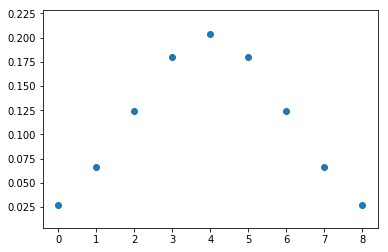

In [8]:
k = 9
plt.scatter(np.arange(9), cv2.getGaussianKernel(9, 2))

In [2]:
import numpy as np
import scipy.stats as st

def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel."""

    x = np.linspace(-nsig, nsig, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

In [16]:
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

In [17]:
x

array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])

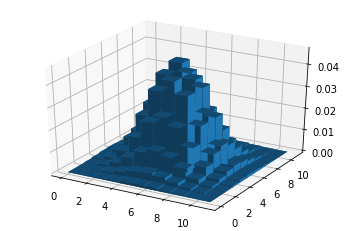

In [4]:
kernel_size = 11

_x = np.arange(kernel_size)
_y = np.arange(kernel_size)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
z = gkern(kernel_size).ravel()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# top = x + y
bottom = np.zeros_like(z)
width = depth = 1

ax.bar3d(x, y, bottom, width, depth, z, shade=True)

In [25]:
!pip install plotly

^C


In [ ]:
user = 'swatts999'
key = 'rBw3vMcQTHboN9fMK1O3'

In [1]:
import plotly.graph_objects as go

In [11]:
import plotly

In [12]:
plotly.offline.init_notebook_mode(connected=True)

In [32]:
fig = go.Figure(data=[go.Surface(z=gkern(15))])
fig.update_layout(title='2D Gaussian Kernel')

import plotly.io as pio
pio.write_html(fig, file='index.html', auto_open=True)

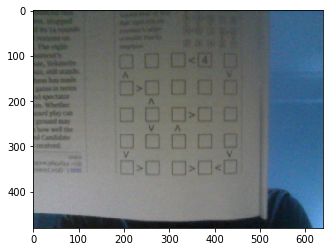

In [213]:
path = r'data/capture_sample.jpg'
img = cv2.imread(path, 1)
plt.imshow(img)
img_original = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [181]:
kernel_size

65

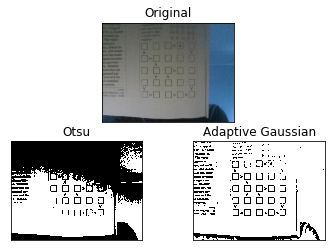

In [227]:
_, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel_size = int(np.asarray(img.shape).max() * 0.10 // 1)
kernel_size = kernel_size if kernel_size % 2 != 0 else kernel_size + 1
C = kernel_size // 10
img_bin_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, kernel_size, 8)

# Invert the image
# img_bin = 255-img_bin 
# cv2.imwrite('data/image_bin.jpg',img_bin)

gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
ax1 = plt.subplot(gs[0, 1:3])
ax2 = plt.subplot(gs[1, :2])
ax3 = plt.subplot(gs[1, 2:])

ax1.imshow(img_original)
ax1.title.set_text('Original')

ax2.imshow(img_bin, cmap='gray')
ax2.title.set_text('Otsu')

ax3.imshow(img_bin_gauss, cmap='gray')
ax3.title.set_text('Adaptive Gaussian')

for x in [ax1, ax2, ax3]:
    x.set_xticks([])
    x.set_yticks([])

plt.show()

In [143]:
img_bin.max() - img_bin.min()

255

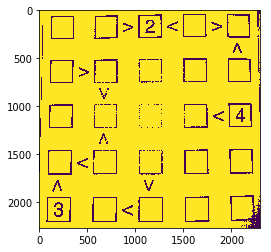

In [144]:
plt.imshow(img_bin)

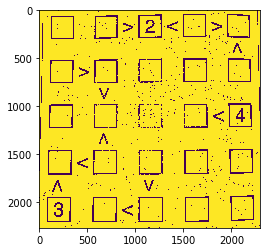

In [145]:
plt.imshow(img_bin_gauss)

In [85]:
# Defining a kernel length
kernel_length = np.array(img).shape[1]//80
 
# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

In [7]:
# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=2)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=1)
cv2.imwrite('data/verticle_lines.jpg',verticle_lines_img)

# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=2)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=1)
cv2.imwrite('data/horizontal_lines.jpg',horizontal_lines_img)

True

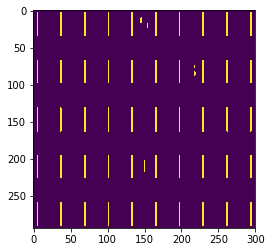

In [8]:
plt.imshow(verticle_lines_img)

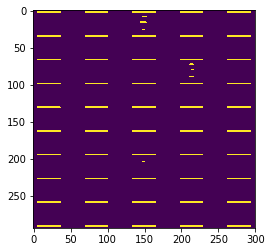

In [9]:
plt.imshow(horizontal_lines_img)

In [10]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha

# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
# img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=1)
(thresh, img_final_bin) = cv2.threshold(img_final_bin,255,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite('data/img_final_bin.jpg',img_final_bin)

True

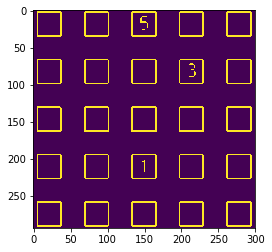

In [11]:
plt.imshow(img_final_bin)

In [12]:
def sort_contours(cnts, method='left-to-right'):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
 
	# handle if we need to sort in reverse
	if method == 'right-to-left' or method == 'bottom-to-top':
		reverse = True
 
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == 'top-to-bottom' or method == 'bottom-to-top':
		i = 1
 
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [13]:
# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort all the contours by top to bottom.
# (contours, boundingBoxes) = sort_contours(contours, method='top-to-bottom')
contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0] + cv2.boundingRect(ctr)[1] * img_final_bin.shape[1] )

In [14]:
### this is currently unecessary

# # process bounding boxes
# # if box is very close to another box, take the smaller one
# # do by center: x + w/2, y + h/2
# centres = []
# for c in contours:
#     # Returns the location and width,height for every contour
#     x, y, w, h = cv2.boundingRect(c)
#     centre = (x + w/2, y + h/2)
#     centres.append((centre, c))
# 
# new_contours = []
# for c in centres:
#     for c_comp in centres:
#         if c[0] == c_comp[0]:
#             continue
#             
#         x_diff = c[0][0] / c_comp[0][0]
#         y_diff = c[0][1] / c_comp[0][1]
#         
#         if x_diff < 5 and y_diff < 5:
#             x, y, w, h = cv2.boundingRect(c[1])
#             x_comp, y_comp, w_comp, h_comp = cv2.boundingRect(c_comp[1])
#             
#             c_size = w * h
#             c_comp_size = w_comp * h_comp
#             
#             if c_size > c_comp_size:
#                 new_contours.append(c_comp[1])
#                 centres.remove(c)
#             else:
#                 new_contours.append(c[1])
#                 centres.remove(c_comp)

In [49]:
cropped_dir_path = r'data/cropped/main_cropped/'
cropped_row_path = r'data/cropped/row_cropped/'
cropped_col_path = r'data/cropped/col_cropped/'

r_ind, c_ind = 0, 0
scale = 0.80
img = cv2.imread(path)
box_contours = []

for i, c in enumerate(contours):
    # Returns the top left vertex coords and width,height for every contour
    # x measured from left, y measured from top
    box_contours.append(c)
    x, y, w, h = cv2.boundingRect(c)
    centre = (x + w/2, y + h/2)
    
    if (20 < w < 50 and 20 < h < 50):        
        # apply scaling
        crop_w, crop_h = int(w * scale), int(h * scale)
        crop_x, crop_y = int(centre[0] - crop_w//2), int(centre[1] - crop_h//2)
        
        new_img = img[crop_y:crop_y+crop_h, crop_x:crop_x+crop_w]
        cv2.imwrite(cropped_dir_path+str(i) + '.png', new_img)
        cv2.rectangle(img,(crop_x,crop_y),(crop_x+crop_w,crop_y+crop_h),(255,0,0),1)
        
        if (i + 1) % 5 != 0:
            x_right = int(x + w * 1.1)
            w_right = int(w * 0.7)
            new_img = img[y:y+h, x_right:x_right+w_right]

            cv2.imwrite(cropped_row_path+str(r_ind) + '.png', new_img)
            r_ind += 1
            cv2.rectangle(img,(x_right,y),(x_right+w_right,y+h),(255,0,0),1)
            
        if i < 20:
            y_below = int(y + h * 1.1)
            h_below = int(h * 0.7)
            new_img = img[y_below:y_below+h_below, x:x+w]
            
            cv2.imwrite(cropped_col_path+str(c_ind) + '.png', new_img)
            c_ind += 1
            cv2.rectangle(img,(x,y_below),(x+w,y_below+h_below),(255,0,0),1)
    
cv2.imwrite('data/img_with_boxes.png', img)

True

In [50]:
contours[0]

array([[[ 6,  2]],

       [[ 5,  3]],

       [[ 5, 34]],

       [[ 6, 35]],

       [[37, 35]],

       [[38, 34]],

       [[38,  3]],

       [[37,  2]]], dtype=int32)

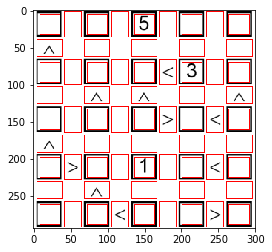

In [51]:
plt.imshow(img)

In [52]:
from ocr import scan_images, ocr_run

In [118]:
16 // 4

4

In [130]:
puzzle_size, start_numbers, inequals = scan_images('data/cropped/')

In [131]:
inequals

[((1, 1), (2, 1)),
 ((3, 1), (4, 1)),
 ((0, 0), (1, 0)),
 ((1, 2), (2, 2)),
 ((2, 0), (3, 0)),
 ((1, 4), (2, 4)),
 ((4, 1), (4, 2)),
 ((4, 4), (4, 3)),
 ((1, 2), (1, 3)),
 ((2, 3), (2, 4)),
 ((3, 1), (3, 0)),
 ((3, 3), (3, 4)),
 ((2, 3), (2, 2))]

In [132]:
inequals == [
        ((0, 0), (1, 0)),
        ((1, 2), (1, 3)),
        ((1, 1), (2, 1)),
        ((1, 2), (2, 2)),
        ((1, 4), (2, 4)),
        ((2, 3), (2, 2)),
        ((2, 3), (2, 4)),
        ((2, 0), (3, 0)),
        ((3, 1), (3, 0)),
        ((3, 3), (3, 4)),
        ((3, 1), (4, 1)),
        ((4, 1), (4, 2)),
        ((4, 4), (4, 3))
        ]

False

In [93]:
row_inequals

{17: 'left_lower',
 19: 'right_lower',
 6: 'left_lower',
 11: 'left_lower',
 12: 'right_lower',
 15: 'left_lower',
 10: 'right_lower'}

In [58]:
col_inequals

{6: 'top_lower',
 16: 'top_lower',
 0: 'top_lower',
 7: 'top_lower',
 10: 'top_lower',
 9: 'top_lower'}

In [91]:
def dim_transform(coord, puzzle_size=5):
    """Transform a 1D grid coordinate into a 2D tuple, default 5x5 grid"""
    return coord // puzzle_size, coord % puzzle_size


In [96]:
5 // 5

1

In [103]:
def convert_inequals(row_inequals, col_inequals):
    inequals = []
    
    for k, v in col_inequals.items():
        above = dim_transform(k) 
        below = dim_transform(k + 5)

        if v == 'top_lower':
            inequals.append((above, below))
        elif v == 'bottom_lower':
            inequals.append((below, above))
            
    for k, v in row_inequals.items():
        adjust = k // 5
        left = dim_transform(k + adjust)
        right = dim_transform(k + adjust + 1)
        
        if v == 'left_lower':
            inequals.append((left, right))
        elif v == 'right_lower':
            inequals.append((right, left))
            
    return inequals
    

In [104]:
convert_inequals(row_inequals, col_inequals)

[((1, 1), (2, 1)),
 ((3, 1), (4, 1)),
 ((0, 0), (1, 0)),
 ((1, 2), (2, 2)),
 ((2, 0), (3, 0)),
 ((1, 4), (2, 4)),
 ((4, 0), (4, 1)),
 ((4, 3), (4, 2)),
 ((1, 2), (1, 3)),
 ((2, 3), (2, 4)),
 ((3, 0), (2, 4)),
 ((3, 3), (3, 4)),
 ((2, 3), (2, 2))]

In [92]:
for k, v in col_inequals.items():
    above = dim_transform(k) 
    below = dim_transform(k + 5)
    
    if v == 'top_lower':
        print((k,v), (above, below))
    elif v == 'bottom_lower':
        print((k,v), (below, above))

(6, 'top_lower') ((1, 1), (2, 1))
(16, 'top_lower') ((3, 1), (4, 1))
(0, 'top_lower') ((0, 0), (1, 0))
(7, 'top_lower') ((1, 2), (2, 2))
(10, 'top_lower') ((2, 0), (3, 0))
(9, 'top_lower') ((1, 4), (2, 4))


In [88]:
(12) // 5

2

In [89]:
(12) % 5

2

In [33]:
test_img = cv2.imread('data/col_cropped/0.png')

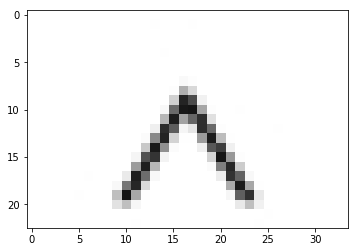

In [34]:
plt.imshow(test_img)

In [37]:
rotated_image = np.rot90(test_img, axes=(1,0))

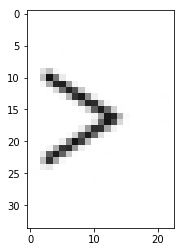

In [38]:
plt.imshow(rotated_image)

In [278]:
def dim_transform(coord, puzzle_size=5):
    """Transform a 1D grid coordinate into a 2D tuple, default 5x5 grid"""
    return coord // puzzle_size, coord % puzzle_size


In [279]:
dim_transform(0)

(0, 0)

In [303]:
(9 + 1) % 5

0

In [304]:
import pickle

In [305]:
with open('data/contours.pkl', 'rb') as handle:
    b = pickle.load(handle)

In [308]:
import cv2

In [311]:
cv2.boundingRect(b[16]), cv2.boundingRect(b[18])

((262, 76, 34, 33), (57, 90, 10, 8))